In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

# **Exercise 3**

Twenty teams of 4 individuals in each team played the "prisoner's dilemma" game 30 times. Each time each individual had to choose between either the "competitive" or the "cooperative" choice. For each team, the number of "cooperative" choices selected by the team members out of the total of 120 choices was recorded, as shown in the following table:

$$
\begin{array}{|c|c|c|}
\hline
 & \textbf{Male} & \textbf{Female} \\
\hline
\textbf{Public choice} & 49 & 64 \\
 & 37 & 52 \\
 & 68 & 54 \\
 & 61 & 79 \\
 & 64 & 29 \\
\hline
\textbf{Secret choice} & 27 & 58 \\
 & 52 & 41 \\
 & 30 & 40 \\
 & 39 & 44 \\
 & 34 & 44 \\
\hline
\end{array}
$$

Ten of the teams recorded their choices while keeping them secret. The other ten teams made their choices and announced them publicly (the choices of the individuals became known to the other individuals). Also, ten of the teams consisted only of men and the remaining ten of the teams consisted only of women.

It is given that the number of "cooperative" choices made by the team members follows the normal distribution with the same variance in all cases. What conclusions can you draw about the effect of the selection condition and gender on cooperation? Is there a significant interaction between the selection condition and gender? It is given that the level of significance is equal to 5%.

## Solution

*Variability between groups and within groups*

The Two-way ANOVA compares the variability within and between groups of a dependent variable. This between-group variability arises from:

The main effect of factor A (in this occasion the gender).
The main effect of factor B (in this occasion the choise).
The interaction between factors A and B.
Three F-ratios are computed to discern how much of the dependent variable's variability can be linked to each effect and the interaction:

- ​$F_A = \frac{Variance from the main effect of A}{Error Variance}$ 

Variability due to factor A's main effect.

- $F_B = \frac{Variance from the main effect of B}{Error Variance}$

Variability due to factor B's main effect.

- $F_{AxB} = \frac{Variance from the AxB interaction effect}{Error Variance}$

Variability due to the interaction between A and B.

If the p-value for a specific factor is less than 0.05, that factor has a significant main effect. To determine the group that differs significantly, we review the mean values for that factor's levels.

For interactions, if the p-value is above 0.05, it suggests that differences in the results of one factor aren't contingent on the levels of the other factor.

*Basic requirment of two way anova:*

The requirement for the Two-way ANOVA is that all levels (values) of the two independent variables are fully combined. That is, each level of the first independent variable must be combined with each level of the second independent variable.



*Assumptions for the application of the Two-way ANOVA:*

- Independence :  
The observations are independent (that is, there is no relationship either between the observations of the different groups or between the observations within the same group).
- Normality : 
The observations of each cell come from populations that follow the normal distribution.
- Equality of variances : 
The distributions of the populations of each cell have equal variances.

The data meets the normality and equal variance assumptions, as the "cooperative" choices across all instances. Given that each team consists of 4 distinct members, with no overlap, and considering their individual "cooperative" choices, it's evident that the samples are independent. Therefore, all prerequisites for a two-way ANOVA are satisfied.

*The Two-way ANOVA is performed :* 

With replication, that is with more than one observations for every combination of the levels of the independent variables.

*Null hypotheses of the Two-way ANOVA with replication:*

The Two-way ANOVA with replication includes testing of the following three null hypotheses: 
- The mean values grouped by the levels of the first factor Α are equal. $(H_0: μ_{Α1}=μ_{Α2})$ were $A_1$ is the "Male"and $A_2$ is "Female".
- The mean values grouped by the levels of the second factor B are equal. $(H_0: μ_{B1}=μ_{B2})$ were $B_1$ is the "Public choise"and $B_2$ is "Secret choise".
- There is no interaction between the two factors.
This test informs us if the effect of a factor depends on the other factor.

Since we have 5 observations for each combination of the levels of the independent variables, we perform the Two-way ANOVA with replication.


In [3]:
male_public = [49, 37, 68, 61, 64]
female_public = [64, 52, 54, 79, 29]
male_secret = [27, 52, 30, 39, 34]
female_secret = [58, 41, 40, 44, 44]

# Creating DataFrame
df = pd.DataFrame({
    'Gender': ['Male']*5 + ['Female']*5 + ['Male']*5 + ['Female']*5,
    'Choice_Type': ['Public']*10 + ['Secret']*10,
    'Cooperative_Choice': male_public + female_public + male_secret + female_secret
})

df

,Gender,Choice_Type,Cooperative_Choice
0,Male,Public,49
1,Male,Public,37
2,Male,Public,68
3,Male,Public,61
4,Male,Public,64
5,Female,Public,64
6,Female,Public,52
7,Female,Public,54
8,Female,Public,79
9,Female,Public,29


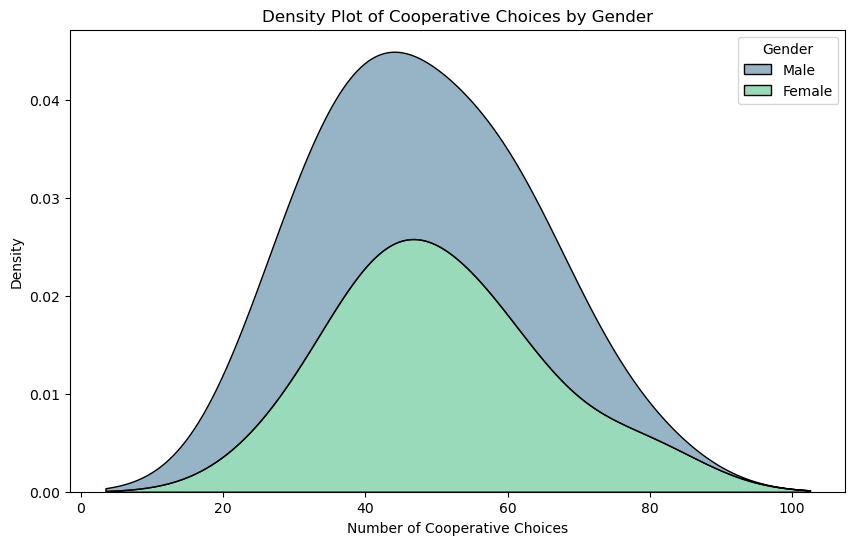

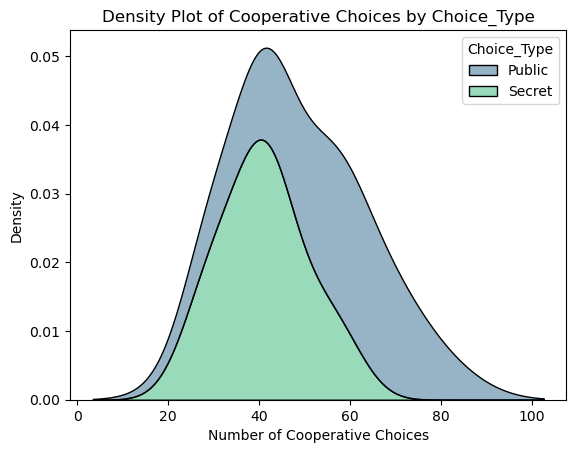

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Cooperative_Choice", hue="Gender", multiple="stack", common_norm=False, fill=True, palette="viridis", alpha=0.5)

plt.title("Density Plot of Cooperative Choices by Gender")
plt.xlabel("Number of Cooperative Choices")
plt.ylabel("Density")

plt.show()

sns.kdeplot(data=df, x="Cooperative_Choice", hue="Choice_Type", multiple="stack", common_norm=False, fill=True, palette="viridis", alpha=0.5)

plt.title("Density Plot of Cooperative Choices by Choice_Type")
plt.xlabel("Number of Cooperative Choices")
plt.ylabel("Density")

plt.show()

The formula table of the two way anova is:

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\textbf{Source of Variation} & \textbf{d.f.} & \textbf{SumSq} & \textbf{MS} & \textbf{F} & \textbf{p-value} \\
\hline
\textbf{Gender} & df_A=a-1 & SS_A & MS_A=\frac{SS_A}{df_A} & \frac{MS_A}{MS_E} & \text{pvalue of } H_{A0} \\
\hline
\textbf{Choice} & df_B=b-1 & SS_B & MS_B=\frac{SS_B}{df_B} & \frac{MS_B}{MS_E} & \text{pvalue of } H_{B0} \\
\hline
\textbf{Gender \& Choice Interaction} & df_{AB}=(a-1)(b-1) & SS_{AB} & MS_{AB}=\frac{SS_{AB}}{df_{AB}} & \frac{MS_{AB}}{MS_E} & \text{pvalue of } H_{AB0} \\
\hline
\textbf{Error} & df_e=ab(n-1) & SS_e & MS_e=\frac{SS_e}{df_e} & & \\
\hline
\end{array}
$$

Were A = Genes Factor, B = Choise Factor.

In [7]:
model = ols('Cooperative_Choice ~ C(Gender) + C(Choice_Type) + C(Gender):C(Choice_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                          sum_sq    df         F    PR(>F)
C(Gender)                   96.8   1.0  0.600217  0.449794
C(Choice_Type)            1095.2   1.0  6.790885  0.019109
C(Gender):C(Choice_Type)   105.8   1.0  0.656022  0.429850
Residual                  2580.4  16.0       NaN       NaN


*Results*

- Effect of Gender on Cooperation:

The F-statistic for Gender is $F=0.600217$
The p-value for Gender is $PR(>F)=0.449794$
Since the p-value for Gender is greater than the significance level of 0.05 we fail to reject the null hypothesis. This suggests that there is no significant main effect of Gender on the cooperative choices made.

- Effect of Selection Condition (Choice_Type) on Cooperation:

The F-statistic for Choice_Type is $F=6.790885$
The p-value for Choice_Type is $PR(>F)=0.019109$
Given that the p-value for Choice type is less than the significance level of 0.05 we reject the null hypothesis. This means that there is a significant main effect of the selection condition (whether the choice was made publicly or in secret) on the cooperative choices made.

- Interaction Effect between Gender and Selection Condition on Cooperation:

The F-statistic for the interaction between Gender and Choice type is $F=0.656022$
The p-value for this interaction is $PR(>F)=0.4298504$
The p-value for the interaction between Gender and Choice type is greater than the significance level of 0.05. Hence, we fail to reject the null hypothesis. This suggests that there isn't a significant interaction effect between Gender and the selection condition on the cooperative choices made.

*In Conclusion*

Based on the data and at the 5% level of significance, the main effect that drives cooperation appears to be the selection condition (whether the decision was made publicly or in secret) and not the gender of the participants. The two factors, Gender and Selection Condition, do not significantly interact to affect cooperative choices.

# **Exercise 4**

Six characteristics X1, X2, X3, X4, X5 and Y are measured simultaneously in fifty patients during a medical study. The measurements are recorded in the following table:

$$
\begin{array}{|c|c|c|c|c|c|c|}
\hline
s/n & \Upsilon & \Chi_1 & \Chi_2 & \Chi_3 & \Chi_4 & \Chi_5 \\
\hline
1 & 15,2 & 3,1 & 3,5 & 2,0 & 1,3 & 1 \\
2 & 16,3 & 2,9 & 3,0 & 2,1 & 1,2 & 1 \\
3 & 30,2 & 1,7 & 3,2 & 3,9 & 1,2 & 2 \\
4 & 12,5 & 2,6 & 3,1 & 2,5 & 1,3 & 1 \\
5 & 26,9 & 1,7 & 3,6 & 3,5 & 1,2 & 2 \\
6 & 35,2 & 1,8 & 3,4 & 3,6 & 1,2 & 2 \\
7 & 29,6 & 2,8 & 4,1 & 3,3 & 1,3 & 3 \\
8 & 23,0 & 2,5 & 3,8 & 2,5 & 1,1 & 2 \\
9 & 15,8 & 3,2 & 3,2 & 3,1 & 1,3 & 1 \\
10 & 24,0 & 2,7 & 4,0 & 4,9 & 1,3 & 2 \\
11 & 21,2 & 2,6 & 3,0 & 3,7 & 1,3 & 3 \\
12 & 15,2 & 3,0 & 3,6 & 2,3 & 1,2 & 1 \\
13 & 13,4 & 3,0 & 3,2 & 2,4 & 1,1 & 1 \\
14 & 17,0 & 2,8 & 3,2 & 2,3 & 1,3 & 1 \\
15 & 14,0 & 2,9 & 3,3 & 2,0 & 1,3 & 1 \\
16 & 14,0 & 2,7 & 3,3 & 2,5 & 1,1 & 2 \\
17 & 24,0 & 2,8 & 3,9 & 3,2 & 1,2 & 2 \\
18 & 16,8 & 3,7 & 4,1 & 2,8 & 1,2 & 2 \\
19 & 35,0 & 2,1 & 5,2 & 5,0 & 1,2 & 4 \\
20 & 32,7 & 2,2 & 3,0 & 3,9 & 1,2 & 3 \\
21 & 38,0 & 1,9 & 3,8 & 3,9 & 1,1 & 3 \\
22 & 37,0 & 1,3 & 3,4 & 4,5 & 1,2 & 2 \\
23 & 45,0 & 1,8 & 3,5 & 4,3 & 1,3 & 3 \\
24 & 23,7 & 2,5 & 4,0 & 4,5 & 1,3 & 3 \\
25 & 12,0 & 3,4 & 2,3 & 2,4 & 1,1 & 1\\
26 & 14,9 & 4,9 & 2,6 & 2,1 & 1,5 & 1 \\
27 & 25,6 & 2,9 & 3,0 & 3,1 & 1,4 & 2 \\
28 & 27,0 & 2,3 & 3,0 & 2,9 & 1,2 & 2 \\
29 & 33,7 & 2,3 & 2,4 & 2,8 & 1,9 & 2 \\
30 & 38,6 & 2,5 & 4,2 & 3,2 & 1,8 & 3 \\
31 & 31,5 & 2,3 & 3,1 & 3,0 & 1,6 & 2 \\
32 & 38,4 & 2,3 & 4,5 & 4,0 & 1,8 & 3 \\
33 & 25,5 & 3,2 & 3,0 & 3,3 & 1,4 & 2 \\
34 & 23,7 & 3,7 & 2,0 & 3,1 & 1,4 & 2 \\
35 & 22,1 & 3,0 & 3,5 & 2,9 & 1,3 & 2 \\
36 & 24,7 & 3,7 & 3,3 & 2,3 & 2,2 & 3 \\
37 & 33,8 & 3,0 & 2,0 & 3,4 & 1,7 & 2 \\
38 & 23,8 & 4,3 & 2,6 & 2,0 & 1,7 & 2 \\
39 & 39,4 & 3,5 & 3,9 & 5,5 & 1,8 & 4 \\
40 & 24,8 & 3,9 & 3,6 & 4,6 & 2,4 & 3 \\
41 & 34,8 & 4,6 & 4,8 & 3,4 & 2,4 & 3 \\
42 & 27,6 & 3,5 & 3,4 & 2,6 & 2,4 & 3 \\
43 & 26,3 & 3,6 & 2,4 & 2,8 & 2,2 & 3 \\
44 & 14,5 & 6,2 & 2,5 & 1,6 & 1,7 & 1 \\
45 & 13,8 & 7,0 & 2,1 & 1,7 & 1,8 & 1 \\
46 & 19,5 & 4,6 & 3,3 & 1,9 & 2,2 & 3 \\
47 & 30,2 & 3,7 & 3,0 & 2,4 & 1,8 & 2 \\
48 & 35,2 & 2,9 & 3,2 & 2,5 & 2,2 & 3 \\
49 & 28,0 & 3,0 & 3,1 & 3,0 & 1,8 & 2 \\
50 & 27,8 & 3,4 & 3,2 & 2,5 & 1,9 & 2 \\
\hline
\end{array}
$$

1) Perform a Principal Component Analysis (PCA) using the variables X1, X2, X3, X4 and X5 to determine:
  i) The smallest number of Principal Components that describe at least 80% of the total variability.
  ii) The coordinates of each of the Principal Components of the question i. with respect to the initial variables.
  iii) The coordinates of the data in the above table in the coordinates system defined by the Principal Components of the question i.
It is given that the assumptions required to apply PCA are valid.
2) Next, find the coefficients of the multiple linear regression model of the variable Y of the above table taking as independent variables the Principal Components of the question A.i. It is given that the assumptions required for the application of the multiple linear regression model are valid.

## Quesstion 1

PCA staff

In [28]:
data = {
#     's/n': list(range(1, 51)),
#     'Υ': [15.2, 16.3, 30.2, 12.5, 26.9, 35.2, 29.6, 23.0, 15.8, 24.0,
#           21.2, 15.2, 13.4, 17.0, 14.0, 14.0, 24.0, 16.8, 35.0, 32.7,
#           38.0, 37.0, 45.0, 23.7, 12.0, 14.9, 25.6, 27.0, 33.7, 38.6,
#           31.5, 38.4, 25.5, 23.7, 22.1, 24.7, 33.8, 23.8, 39.4, 24.8,
#           34.8, 27.6, 26.3, 14.5, 13.8, 19.5, 30.2, 35.2, 28.0, 27.8],
    'Χ1': [3.1, 2.9, 1.7, 2.6, 1.7, 1.8, 2.8, 2.5, 3.2, 2.7,
           2.6, 3.0, 3.0, 2.8, 2.9, 2.7, 2.8, 3.7, 2.1, 2.2,
           1.9, 1.3, 1.8, 2.5, 3.4, 4.9, 2.9, 2.3, 2.3, 2.5,
           2.3, 2.3, 3.2, 3.7, 3.0, 3.7, 3.0, 4.3, 3.5, 3.9,
           4.6, 3.5, 3.6, 6.2, 7.0, 4.6, 3.7, 2.9, 3.0, 3.4],
    'Χ2': [3.5, 3.0, 3.2, 3.1, 3.6, 3.4, 4.1, 3.8, 3.2, 4.0,
           3.0, 3.6, 3.2, 3.2, 3.3, 3.3, 3.9, 4.1, 5.2, 3.0,
           3.8, 3.4, 3.5, 4.0, 2.3, 2.6, 3.0, 3.0, 2.4, 4.2,
           3.1, 4.5, 3.0, 2.0, 3.5, 3.3, 2.0, 2.6, 3.9, 3.6,
           4.8, 3.4, 2.4, 2.5, 2.1, 3.3, 3.0, 3.2, 3.1, 3.2],
    'Χ3': [2.0, 2.1, 3.9, 2.5, 3.5, 3.6, 3.3, 2.5, 3.1, 4.9,
           3.7, 2.3, 2.4, 2.3, 2.0, 2.5, 3.2, 2.8, 5.0, 3.9,
           3.9, 4.5, 4.3, 4.5, 2.4, 2.1, 3.1, 2.9, 2.8, 3.2,
           3.0, 4.0, 3.3, 3.1, 2.9, 2.3, 3.4, 2.0, 5.5, 4.6,
           3.4, 2.6, 2.8, 1.6, 1.7, 1.9, 2.4, 2.5, 3.0, 2.5],
    'Χ4': [1.3, 1.2, 1.2, 1.3, 1.2, 1.2, 1.3, 1.1, 1.3, 1.3,
           1.3, 1.2, 1.1, 1.3, 1.3, 1.1, 1.2, 1.2, 1.2, 1.2,
           1.1, 1.2, 1.3, 1.3, 1.1, 1.5, 1.4, 1.2, 1.9, 1.8,
           1.6, 1.8, 1.4, 1.4, 1.3, 2.2, 1.7, 1.7, 1.8, 2.4,
           2.4, 2.4, 2.2, 1.7, 1.8, 2.2, 1.8, 2.2, 1.8, 1.9],
    'Χ5': [1, 1, 2, 1, 2, 2, 3, 2, 1, 2,
           3, 1, 1, 1, 1, 2, 2, 2, 4, 3,
           3, 2, 3, 3, 1, 1, 2, 2, 2, 3,
           2, 3, 2, 2, 2, 3, 2, 2, 4, 3,
           3, 3, 3, 1, 1, 3, 2, 3, 2, 2]
}

df = pd.DataFrame(data)
print(df.shape)
print(df.head())

(50, 5)
    Χ1   Χ2   Χ3   Χ4  Χ5
0  3.1  3.5  2.0  1.3   1
1  2.9  3.0  2.1  1.2   1
2  1.7  3.2  3.9  1.2   2
3  2.6  3.1  2.5  1.3   1
4  1.7  3.6  3.5  1.2   2


In [29]:
pca = PCA()
pca.fit(df)

# Find number of components for 80% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.where(cumulative_variance > 0.8)[0][0] + 1

print(f"Number of components for >= 80% variance: {num_components}")

Number of components for >= 80% variance: 2


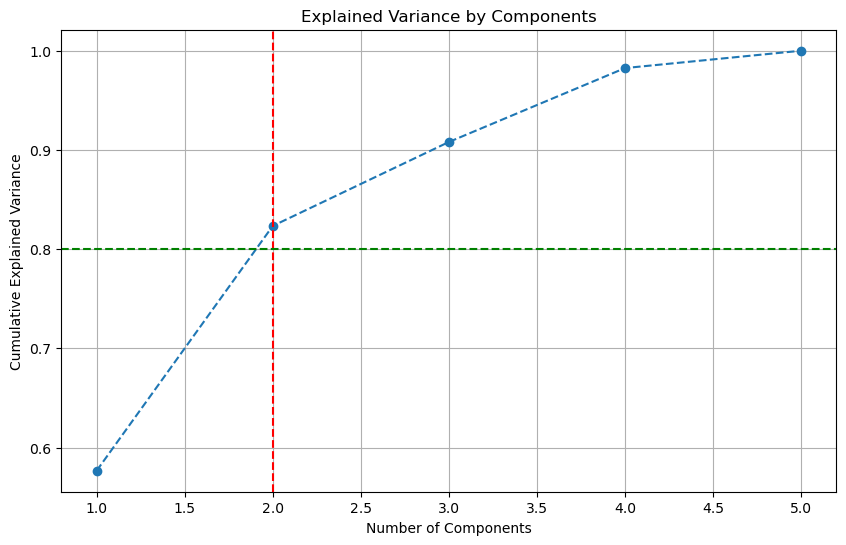

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axvline(x=num_components, color='r', linestyle='--')
plt.axhline(y=0.8, color='g', linestyle='--')
plt.show()

In [33]:
# ii) Coordinates with respect to initial variables
loadings = pca.components_

first_two_pc_loadings = loadings[:2, :]
# print(f"Loadings:\n{loadings}")

first_two_pc_loadings

array([[ 0.6222056 , -0.3122432 , -0.58503694,  0.05798617, -0.41198758],
       [ 0.67819152,  0.17960708,  0.2357698 ,  0.30969952,  0.59690566]])

In [21]:
# iii) Transform the dataset to the new coordinate system
transformed_data = pca.transform(df)

# If you want to see the transformed data for the principal components you've retained:
df_transformed = pd.DataFrame(transformed_data[:, :num_components], columns=[f'PC{i+1}' for i in range(num_components)])

print(df_transformed)

          PC1        PC2
0   26.128747  -4.935301
1   24.922374  -4.073382
2   20.998281   9.487354
3   23.792766  -8.109629
4   19.754632   5.856552
5   16.999696  13.671206
6   17.168831   8.019566
7   17.635933   1.310653
8   18.190754  -5.966845
9   15.467252   2.038318
10  15.059368  -0.940827
11  15.401824  -7.208657
12  14.809660  -9.167138
13  13.066495  -5.883937
14  12.728863  -9.026166
15  11.742535  -9.115014
16   8.630458   0.421492
17   9.164892  -6.859520
18   4.321055  11.025836
19   3.834443   8.350011
20   1.744514  13.324929
21   1.020651  12.168625
22  -1.705998  19.708651
23   1.853297  -1.142324
24   3.378280 -13.109485
25   1.726604 -10.657279
26  -1.485100  -0.179690
27  -2.736722   1.002105
28  -5.164714   7.245129
29  -7.198496  11.921197
30  -6.633294   4.738048
31  -9.096251  11.399531
32  -7.327991  -1.546612
33  -7.944633  -3.594590
34  -8.540727  -5.252905
35 -10.139669  -3.000709
36 -13.013555   5.634465
37 -11.892682  -4.455967
38 -16.204362  10.953573
